In [62]:
# Imports

from random import *
from math import *
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

Nombre de liens =8


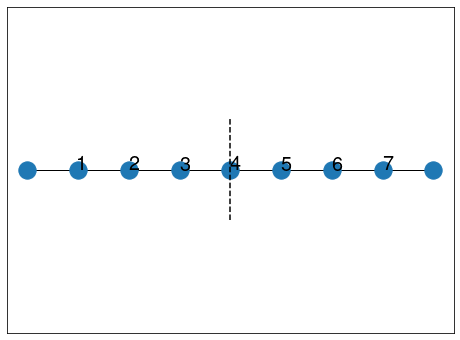

In [63]:
# Definition of the graph

l0 = 1.0
alpha = 1E20

N = 9
Nmat = N-2

G = nx.Graph(directed=False)
G.add_node((0,0))
pos = {}
pos[(0,0)] = (-(N-1)/2,0)

for i in range(N-1):
        
        G.add_edge((i,0),(i+1,0))
        pos[(i+1,0)] = (pos[(i,0)][0] + l0,pos[(0,0)][1])

def index2tuple(pos,i):
    # Return the tuple corresponding to node index i
    return [i for i in pos.keys()][i]

def tuple2index(pos,tuple):
    # Return the index corresponding to node tuple
    return [i for i in pos.keys()].index(tuple)

print('Nombre de liens ='+str(len([e for e in G.edges])))

X = []
Y = []
for i in range(N):
    X.append(pos[index2tuple(pos,i)][0])
    Y.append(pos[index2tuple(pos,i)][1])
X = np.array(X[0:], dtype=float)
Y = np.array(Y[0:], dtype=float)

plt.figure(figsize=(8,6))
nx.draw_networkx(G, pos, with_labels=False)
for i in range(1,Nmat+1):
    plt.text(X[i], Y[i], i, fontsize=20, color='black')
plt.axis('equal')
plt.plot([0,0], [-1,1], 'k--')
plt.show()

In [64]:
eigenvectors = np.zeros([2*N, 2*Nmat])
eigenvalues = np.zeros(2*Nmat)

for p in range(Nmat):
    eigenvalues[2*p+1] = 4*(sin((pi*(p+1))/(2*(Nmat+1)))**2)
    for i in range(N):
        eigenvectors[2*i,2*p+1] = sqrt(2/(Nmat+1))*sin(i*(p+1)*pi/(Nmat+1)) # y
for p in range(Nmat):
    eigenvalues[2*p] = 4*(1 - (1/alpha))*(sin((pi*(p+1))/(2*(Nmat+1)))**2)
    for i in range(N):
        eigenvectors[2*i+1,2*p] = sqrt(2/(Nmat+1))*sin(i*(p+1)*pi/(Nmat+1)) # x
        
print(eigenvalues)

[0.15224093 0.15224093 0.58578644 0.58578644 1.23463314 1.23463314
 2.         2.         2.76536686 2.76536686 3.41421356 3.41421356
 3.84775907 3.84775907]


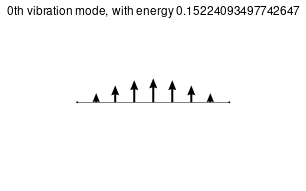

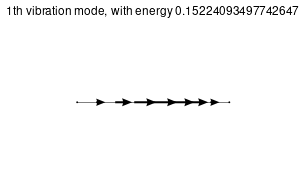

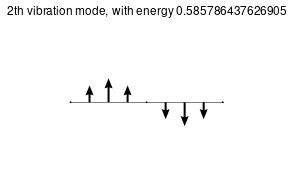

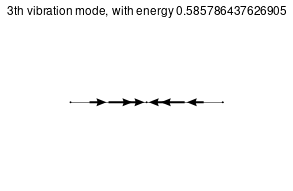

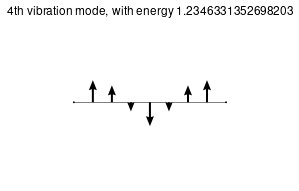

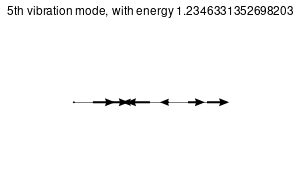

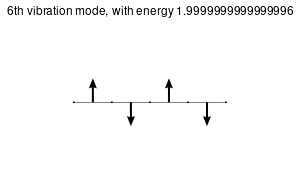

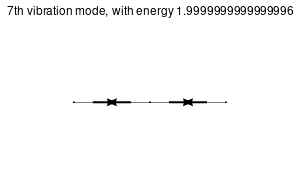

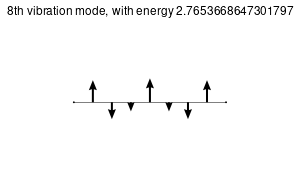

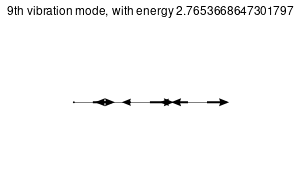

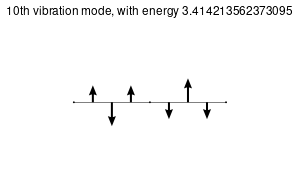

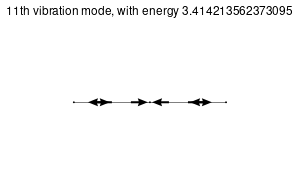

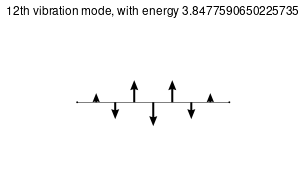

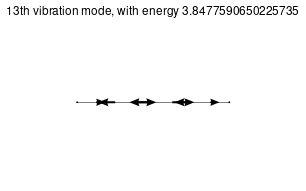

In [65]:
for i in range(2*Nmat):
    
    eig_tmp = eigenvectors[:,i]
    ux = eig_tmp[0::2]
    uy = eig_tmp[1::2]

    fig = plt.figure(figsize=(3,3))
    
    for l in range(N):
        for neighbors in [p for p in G.neighbors(index2tuple(pos,l))]:
            j = tuple2index(pos,neighbors)
            plt.plot([X[l], X[j]], [Y[l], Y[j]], 'gray', linewidth=1.0)
    plt.quiver(X[:], Y[:], ux[:], uy[:],zorder=10^6, width=0.012, scale=3.5, linewidth=5.0, headwidth=4)
    xmin, xmax, ymin, ymax = plt.axis("equal")
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title(str(i)+'th vibration mode, with energy '+str(eigenvalues[i]))
    plt.show()

In [66]:
def makeRotationMatrix(theta):
    
    sig = np.array([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]], dtype=float)
    
    return(sig)

def createMapping(X, Y):
    
    # Rotation
    
    sig = makeRotationMatrix(np.pi)
    mappingRot = {}
    
    for i in range(N):
        
        Xr, Yr = np.dot(sig, [X[i], Y[i]])
        distij = []
        
        for j in range(N):
            
            dist_ = sqrt((X[j] - Xr)**2 + (Y[j] - Yr)**2)
            distij.append(dist_)
            
        min_value = min(distij)
        min_index = distij.index(min_value)
        
        mappingRot[i] = min_index
            
    # Reflection
    
    mappingRefl = {}
    
    for i in range(N):
        
        Xr, Yr = X[i], -Y[i]
        distij = []
        
        for j in range(N):
            
            dist_ = sqrt((X[j] - Xr)**2 + (Y[j] - Yr)**2)
            distij.append(dist_)
            
        min_value = min(distij)
        min_index = distij.index(min_value)
        
        mappingRefl[i] = min_index
    
    return(mappingRot, mappingRefl)

mappingRot, mappingRefl = createMapping(X, Y)
print(mappingRot)
print(mappingRefl)

{0: 8, 1: 7, 2: 6, 3: 5, 4: 4, 5: 3, 6: 2, 7: 1, 8: 0}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}


In [67]:
def reflection(Nmat, vec):
    
    mapping = mappingRefl

    reflectedVec = np.zeros(2*N)
    
    for i in range(N):
        
        ui_reflected = [vec[2*i], -vec[2*i+1]]
        
        reflectedVec[2*mapping[i]:2*mapping[i]+2] = ui_reflected
        
    return reflectedVec
    
def rotation(Nmat, vec, ang):
    
    mapping = mappingRot
    
    rotatedVec = np.zeros(2*N)
        
    sig = makeRotationMatrix(ang)
    
    for i in range(N):
        
        ui = [vec[2*i], vec[2*i+1]]
        ui_rotated = np.dot(sig,ui)
        
        rotatedVec[2*mapping[i]:2*mapping[i]+2] = ui_rotated
        
    return rotatedVec

def scalarProduct(vec1, vec2):
    
    scPr = 0
    
    ux1 = vec1[0::2]
    uy1 = vec1[1::2]
    
    ux2 = vec2[0::2]
    uy2 = vec2[1::2]
    
    scPr = np.sum(ux1*ux2 + uy1*uy2)
    
    return scPr

(18,) (18,)


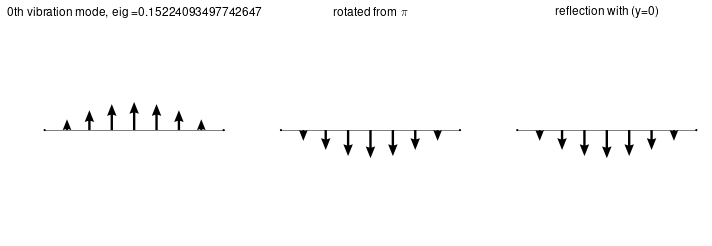

Scalar product of the mode with itself:
1.0
Scalar product of the mode with itself rotated from pi:
-1.0
Scalar product of the mode reflected:
-1.0


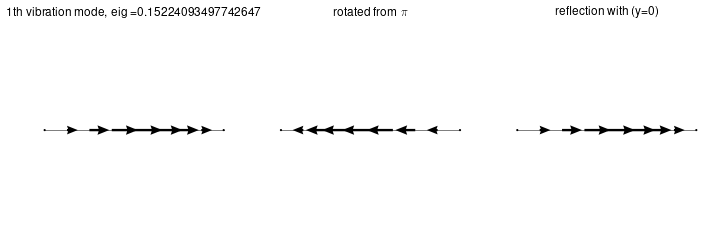

Scalar product of the mode with itself:
1.0
Scalar product of the mode with itself rotated from pi:
-1.0
Scalar product of the mode reflected:
1.0


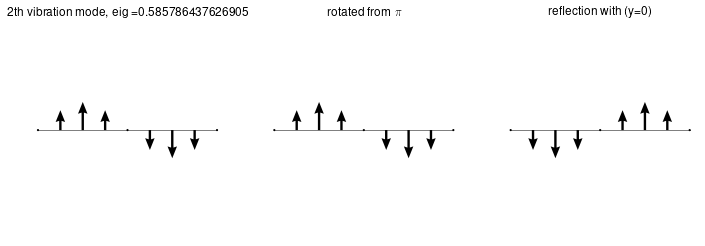

Scalar product of the mode with itself:
1.0
Scalar product of the mode with itself rotated from pi:
1.0
Scalar product of the mode reflected:
-1.0


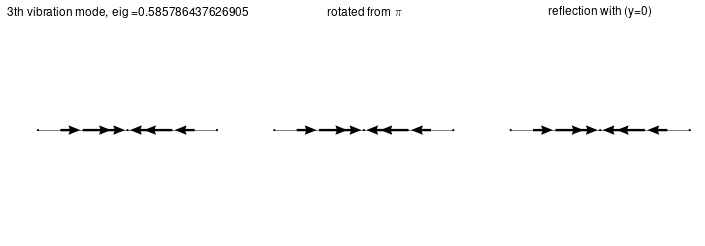

Scalar product of the mode with itself:
1.0
Scalar product of the mode with itself rotated from pi:
1.0
Scalar product of the mode reflected:
1.0


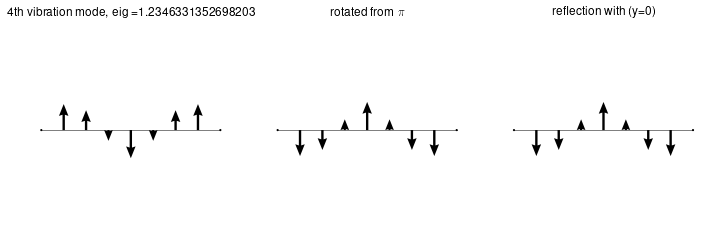

Scalar product of the mode with itself:
1.0
Scalar product of the mode with itself rotated from pi:
-1.0
Scalar product of the mode reflected:
-1.0


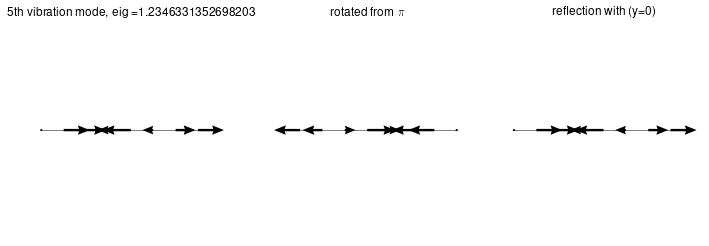

Scalar product of the mode with itself:
1.0
Scalar product of the mode with itself rotated from pi:
-1.0
Scalar product of the mode reflected:
1.0


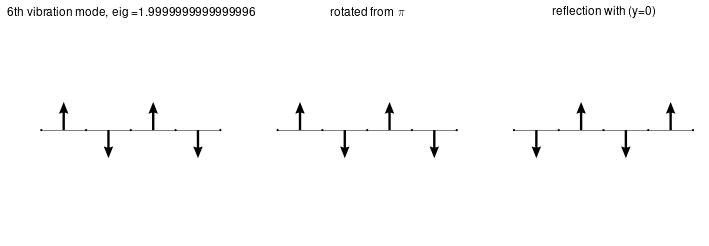

Scalar product of the mode with itself:
1.0
Scalar product of the mode with itself rotated from pi:
1.0
Scalar product of the mode reflected:
-1.0


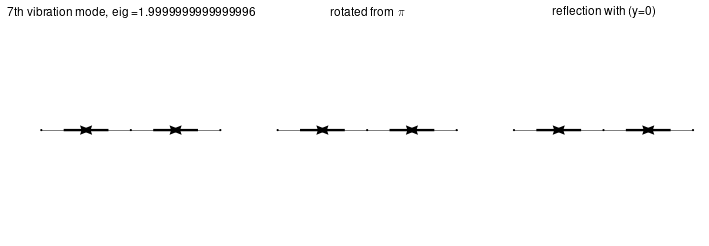

Scalar product of the mode with itself:
1.0
Scalar product of the mode with itself rotated from pi:
1.0
Scalar product of the mode reflected:
1.0


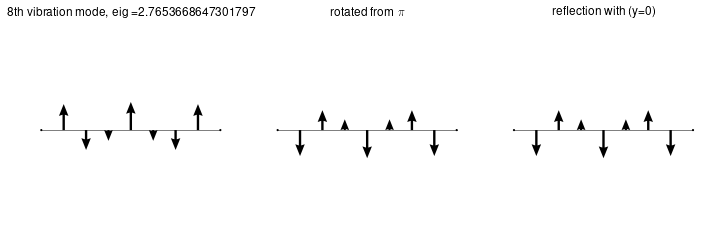

Scalar product of the mode with itself:
1.0000000000000004
Scalar product of the mode with itself rotated from pi:
-1.0000000000000002
Scalar product of the mode reflected:
-1.0000000000000004


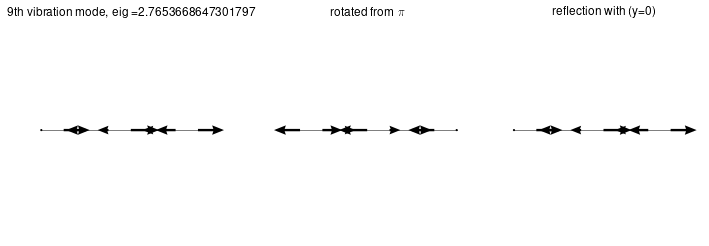

Scalar product of the mode with itself:
1.0000000000000004
Scalar product of the mode with itself rotated from pi:
-1.0000000000000002
Scalar product of the mode reflected:
1.0000000000000004


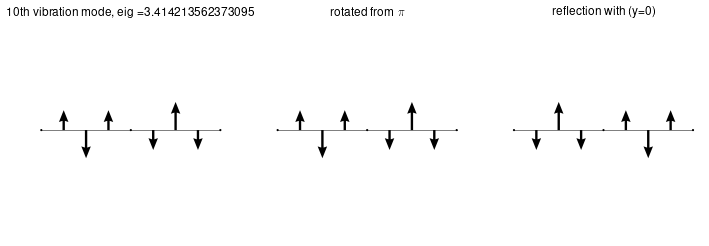

Scalar product of the mode with itself:
1.0000000000000004
Scalar product of the mode with itself rotated from pi:
1.0000000000000002
Scalar product of the mode reflected:
-1.0000000000000004


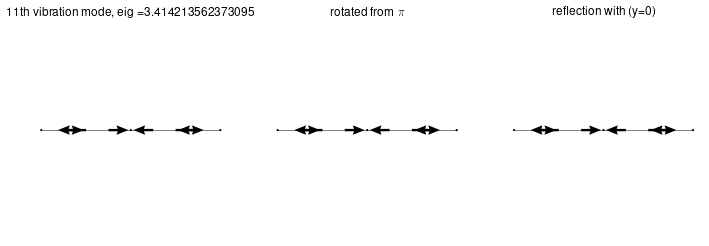

Scalar product of the mode with itself:
1.0000000000000004
Scalar product of the mode with itself rotated from pi:
1.0000000000000002
Scalar product of the mode reflected:
1.0000000000000004


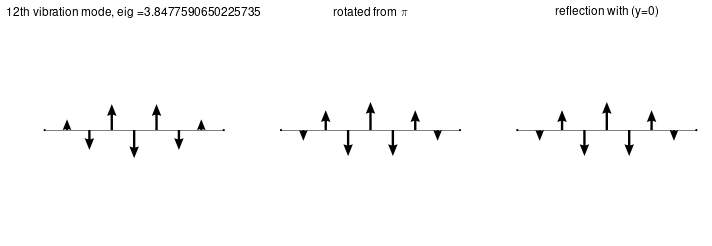

Scalar product of the mode with itself:
0.9999999999999996
Scalar product of the mode with itself rotated from pi:
-0.9999999999999996
Scalar product of the mode reflected:
-0.9999999999999996


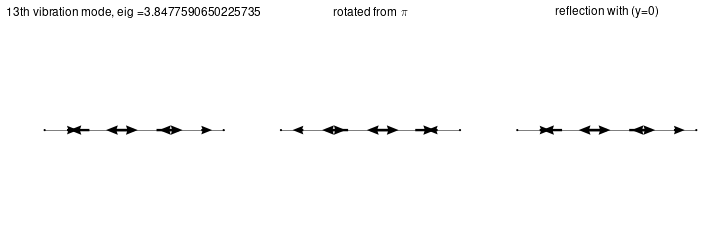

Scalar product of the mode with itself:
0.9999999999999996
Scalar product of the mode with itself rotated from pi:
-0.9999999999999996
Scalar product of the mode reflected:
0.9999999999999996


In [68]:
RotationSym = []
ReflectionSym = []

print(np.shape(eigenvectors[:,i]), np.shape(rotation(Nmat, eigenvectors[:,i], np.pi)))

for i in range(2*Nmat):
    
    eig_tmp = eigenvectors[:,i]
    ux = eig_tmp[0::2]
    uy = eig_tmp[1::2]

    fig = plt.figure(figsize=(12,4))
    
    plt.subplot(1,3,1)
    
    plt.plot([-3.5, 3.5], [0, 0], 'w-')
    
    for l in range(N):
        for neighbors in [p for p in G.neighbors(index2tuple(pos,l))]:
            j = tuple2index(pos,neighbors)
            plt.plot([X[l], X[j]], [Y[l], Y[j]], 'gray', linewidth=1.0)
    plt.quiver(X[:], Y[:], ux[:], uy[:],zorder=10^6, width=0.012, scale=3.5, linewidth=5.0, headwidth=4)
    xmin, xmax, ymin, ymax = plt.axis("equal")
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title(str(i)+'th vibration mode, eig ='+str(eigenvalues[i]))
    
    eig_tmp = rotation(Nmat, eigenvectors[:,i], pi)
    ux = eig_tmp[0::2]
    uy = eig_tmp[1::2]
    
    plt.subplot(1,3,2)
    
    plt.plot([-3.5, 3.5], [0, 0], 'w-')
    
    for l in range(N):
        for neighbors in [p for p in G.neighbors(index2tuple(pos,l))]:
            j = tuple2index(pos,neighbors)
            plt.plot([X[l], X[j]], [Y[l], Y[j]], 'gray', linewidth=1.0)
    plt.quiver(X[:], Y[:], ux[:], uy[:],zorder=10^6, width=0.012, scale=3.5, linewidth=5.0, headwidth=4)
    xmin, xmax, ymin, ymax = plt.axis("equal")
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title(r'rotated from $\pi$')
    
    eig_tmp = reflection(Nmat, eigenvectors[:,i])
    ux = eig_tmp[0::2]
    uy = eig_tmp[1::2]
    
    plt.subplot(1,3,3)
    
    plt.plot([-3.5, 3.5], [0, 0], 'w-')
    
    for l in range(N):
        for neighbors in [p for p in G.neighbors(index2tuple(pos,l))]:
            j = tuple2index(pos,neighbors)
            plt.plot([X[l], X[j]], [Y[l], Y[j]], 'gray', linewidth=1.0)
    plt.quiver(X[:], Y[:], ux[:], uy[:],zorder=10^6, width=0.012, scale=3.5, linewidth=5.0, headwidth=4)
    xmin, xmax, ymin, ymax = plt.axis("equal")
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title(r'reflection with (y=0)')
    
    plt.show()
    
    RotationSym_ = scalarProduct(eigenvectors[:,i],rotation(Nmat, eigenvectors[:,i], pi))
    ReflectionSym_ = scalarProduct(eigenvectors[:,i],reflection(Nmat, eigenvectors[:,i]))
    
    RotationSym.append(RotationSym_)
    ReflectionSym.append(ReflectionSym_)
    
    print('Scalar product of the mode with itself:')
    print(scalarProduct(eigenvectors[:,i],eigenvectors[:,i])) 
    print('Scalar product of the mode with itself rotated from pi:')
    print(RotationSym_)
    print('Scalar product of the mode reflected:')
    print(ReflectionSym_)

In [69]:
for i in range(2*Nmat):
    print(i, eigenvalues[i])
    print("Rotation symmetry : ", RotationSym[i])
    print("Reflection symmetry : ", ReflectionSym[i])
    print('')
    
print(RotationSym)
print(ReflectionSym)

0 0.15224093497742647
Rotation symmetry :  -1.0
Reflection symmetry :  -1.0

1 0.15224093497742647
Rotation symmetry :  -1.0
Reflection symmetry :  1.0

2 0.585786437626905
Rotation symmetry :  1.0
Reflection symmetry :  -1.0

3 0.585786437626905
Rotation symmetry :  1.0
Reflection symmetry :  1.0

4 1.2346331352698203
Rotation symmetry :  -1.0
Reflection symmetry :  -1.0

5 1.2346331352698203
Rotation symmetry :  -1.0
Reflection symmetry :  1.0

6 1.9999999999999996
Rotation symmetry :  1.0
Reflection symmetry :  -1.0

7 1.9999999999999996
Rotation symmetry :  1.0
Reflection symmetry :  1.0

8 2.7653668647301797
Rotation symmetry :  -1.0000000000000002
Reflection symmetry :  -1.0000000000000004

9 2.7653668647301797
Rotation symmetry :  -1.0000000000000002
Reflection symmetry :  1.0000000000000004

10 3.414213562373095
Rotation symmetry :  1.0000000000000002
Reflection symmetry :  -1.0000000000000004

11 3.414213562373095
Rotation symmetry :  1.0000000000000002
Reflection symmetry :  